# Capstone Project - The Battle of the Neighborhoods
###  Applied Data Science Capstone by IBM/Coursera
---
### Vergara, Enrico Marco
##### December 23, 2019
---
### Table of Contents
  1. [Introduction](#intro)
    1. [Background Information](#background)
    2. [Business Problem](#problem)
    3. [Target Interest](#interest)
  2. [Data Definition and Cleaning](#data)
    1. [Data Definition](#def)
    2. [Data Cleaning](#clean)
  3. [Methodology](#method)
    1. [Exploratory Data Analysis](#eda)
    2. [Modelling](#model)
  4. [Cluster Analysis](#analysis)
  5. [Results and Discussion](#res)
  6. [Conclusion](#conclusion)

## Introduction <a class="anchor" id="intro"></a>
___

### A. Background Information <a class="anchor" id="background"></a>
**Scholastic Assessment Test (SAT)** is a standardized examination usually taken by high school juniors and seniors used for college admissions in United States. This test is conducted in order to measure literacy, numeracy and writing skills which are three important components needed for academic success in college. In addition, SAT is said to be an assessment  on how well the students analyze and solve problems which are skills learned in school that is vital in college. However, the test is administered under time constraint in order to help produce a range of scores.  
  
With future as the biggest consequence of this assessment specially for incoming college students, it is important for parents to consider which accredited high school would help students achieve the needed skills to be learned as preparation for college. Preferably, parents want to know which public high school's students received the highest overall SAT score and which borough has the highest performing schools. This will serve as a guide for them in order to select the best school for their children in the hope of a bright future.  
### B. Business Problem <a class="anchor" id="problem"></a>
The average SAT scores for NYC public schools dataset from Kaggle provides a rich data compilation of average scores on each SAT test section for the 2014-2015 school year.  
  
This project aims to help parents select which area or borough in NYC is recommended for high performance on SAT, explore the neighborhoods of that borough to find the most venues in each neighborhood that may affect the life of the students and cluster the neighborhoods using k-mean clustering.  
### C. Target Interest <a class="anchor" id="interest"></a>
The project is intended for parents who are considering which borough they are to select with the highest satisfactory performance on SAT. In addition, check the public high school in that area they can consider to be the next home of their children and what are the most common venues on that boroughs that will certainly affect the life of the students.

## Data Definition and Cleaning <a class="anchor" id="data"></a>
___

### A. Data Definition <a class="anchor" id="def"></a>
The dataset to be used came from Kaggle, [Average SAT Scores for NYC Public Schools](https://www.kaggle.com/nycopendata/high-schools).  

This dataset consists of a row for every accredited high school in New York City with the following attributes:
  * School ID: The unique id of the school
  * School Name: The name of the school
  * Borough: Common name for NYC borough
  * Building Code: The unique identifier of the building
  * Street Address: The specific address
  * City: The city where school is located
  * State: NYC 
  * Zip Code: The address zipcode
  * Latitude: The latitude of the locaton
  * Longitude: The longitude of the location
  * Phone Number: The school's phone number
  * Start Time: Start of classes
  * End Time: End of classes
  * Student Enrollment: No. of enrollment for the school year
  * Percent White: Percent of white from the total population
  * Percent Black: Percent of black from the total population
  * Percent Hispanic: Percent of hispanic from the total population
  * Percent Asian: Percent of asian from the total population
  * Average Score (SAT Math): Average score in Math
  * Average Score (SAT Reading): Average score in Reading
  * Average Score (SAT Writing): Average score in Writing
  * Percent Tested: Percent of the sample tested from the whole population
  
This data will be used to describe the different goals of the project such as which borough they are to select with the highest satisfactory performance on SAT and check the public high school in that area they can consider to be the next home of their children.
  
In order to determine  the most common venues for each neighborhood on the most desired boroughs that will certainly affect the life of the students, the final dataset will be used to fetch data using the Foursquare API and then using k-means clustering algorithm to cluster similar neighborhoods.   

### B. Data Cleaning <a class="anchor" id="clean"></a>

#### Importing Libraries

In [1]:
import requests 
import pandas as pd 
import numpy as np 
import random 
import folium 
import geocoder
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim 
from geopy.exc import GeocoderTimedOut
from IPython.display import Image, display, HTML, IFrame 
from IPython.core.display import HTML, display
from pandas.io.json import json_normalize
from matplotlib.pyplot import figure
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

%matplotlib inline 
mpl.style.use('ggplot')
pd.set_option('display.max_columns', 1000)

#### Define Foursquare Credentials and Version

In [2]:
client_id = 'VS0KQ3WUCVWPQX5YRKH5VYTCGT04NWVZEGYUKOQX2TTJGWHA'
client_secret = 'EANHPKTYB2FH4I3WRIHXMPZLHP4I0IR4KTS1BHYANYFQDA3J' 
version = '20180605'
limit = 30

print('CREDENTIALS:')
print('CLIENT_ID: ' + client_id)
print('CLIENT_SECRET:' + client_secret)

CREDENTIALS:
CLIENT_ID: VS0KQ3WUCVWPQX5YRKH5VYTCGT04NWVZEGYUKOQX2TTJGWHA
CLIENT_SECRET:EANHPKTYB2FH4I3WRIHXMPZLHP4I0IR4KTS1BHYANYFQDA3J


#### Loading the Dataset

In [3]:
scores = pd.read_csv("NYC_SAT.csv")

# Printing the data dimension
print('Data Dimension: ', scores.shape)

Data Dimension:  (435, 22)


In [4]:
# Printing sample data
scores.head()

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,Phone Number,Start Time,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,212-695-9114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Inwood Early College for Health and Informatio...,Manhattan,M052,650 Academy Street,Manhattan,NY,10002,40.86605,-73.92486,718-935-3660,8:30 AM,3:00 PM,87.0,3.4%,21.8%,67.8%,4.6%,NaN,NaN,NaN,NaN
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,212-677-5190,8:15 AM,4:00 PM,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,212-475-4773,8:00 AM,2:45 PM,358.0,11.7%,38.5%,41.3%,5.9%,395.0,411.0,387.0,78.9%
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,212-505-0143,8:30 AM,3:00 PM,383.0,3.1%,28.2%,56.9%,8.6%,418.0,428.0,415.0,65.1%


In [5]:
# Changing column names
scores.columns = ['School_ID','School_Name','Borough','Building_Code','Street_Address','City','State','Zip_Code',
                 'Latitude','Longitude','Phone_Number','Start_Time','End_Time','Student_Enrollment','Percent_White',
                 'Percent_Black','Percent_Hispanic','Percent_Asian','Ave_SAT_Score_Math',
                  'Ave_SAT_Score_Reading','Ave_SAT_Score_Writing','Percent_Tested']
scores.head()

,School_ID,School_Name,Borough,Building_Code,Street_Address,City,State,Zip_Code,Latitude,Longitude,Phone_Number,Start_Time,End_Time,Student_Enrollment,Percent_White,Percent_Black,Percent_Hispanic,Percent_Asian,Ave_SAT_Score_Math,Ave_SAT_Score_Reading,Ave_SAT_Score_Writing,Percent_Tested
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,212-695-9114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Inwood Early College for Health and Informatio...,Manhattan,M052,650 Academy Street,Manhattan,NY,10002,40.86605,-73.92486,718-935-3660,8:30 AM,3:00 PM,87.0,3.4%,21.8%,67.8%,4.6%,NaN,NaN,NaN,NaN
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,212-677-5190,8:15 AM,4:00 PM,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,212-475-4773,8:00 AM,2:45 PM,358.0,11.7%,38.5%,41.3%,5.9%,395.0,411.0,387.0,78.9%
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,212-505-0143,8:30 AM,3:00 PM,383.0,3.1%,28.2%,56.9%,8.6%,418.0,428.0,415.0,65.1%


In [6]:
# Removing all the entires where average SAT is null
scores = scores[scores.Ave_SAT_Score_Math >= 0]
scores = scores[scores.Ave_SAT_Score_Reading >= 0]
scores = scores[scores.Ave_SAT_Score_Writing >= 0]
print('New Data Dimension: ', scores.shape)

New Data Dimension:  (375, 22)


In [7]:
scores['Ave_SAT_Score_Overall'] = scores[['Ave_SAT_Score_Math', 'Ave_SAT_Score_Reading', 'Ave_SAT_Score_Writing']].sum(axis=1)

In [8]:
# View the information of the dataset 
scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375 entries, 2 to 434
Data columns (total 23 columns):
School_ID                375 non-null object
School_Name              375 non-null object
Borough                  375 non-null object
Building_Code            375 non-null object
Street_Address           375 non-null object
City                     375 non-null object
State                    375 non-null object
Zip_Code                 375 non-null int64
Latitude                 375 non-null float64
Longitude                375 non-null float64
Phone_Number             375 non-null object
Start_Time               374 non-null object
End_Time                 374 non-null object
Student_Enrollment       375 non-null float64
Percent_White            375 non-null object
Percent_Black            375 non-null object
Percent_Hispanic         375 non-null object
Percent_Asian            375 non-null object
Ave_SAT_Score_Math       375 non-null float64
Ave_SAT_Score_Reading    375 non-null

## Methodology<a class="anchor" id="method"></a>
___

### A. Exploratory Data Analysis <a class="anchor" id="eda"></a>
#### Descriptive Statistics of the average SAT Score
---

In [9]:
scores.iloc[:,18:24].describe()

,Ave_SAT_Score_Math,Ave_SAT_Score_Reading,Ave_SAT_Score_Writing,Ave_SAT_Score_Overall
count,375.000000,375.000000,375.000000,375.000000
mean,432.944000,424.504000,418.458667,1275.906667
std,71.952373,61.881069,64.548599,194.906283
min,317.000000,302.000000,284.000000,924.000000
25%,386.000000,386.000000,382.000000,1157.000000
50%,415.000000,413.000000,403.000000,1226.000000
75%,458.500000,445.000000,437.500000,1330.500000
max,754.000000,697.000000,693.000000,2144.000000


##### SAT has three sections (Math, Reading, and Writing) worth 800 points each with a maximum total score of 2400. In the dataset used, the mean of public school SAT score is 1275 and the median is 1226, meaning the distribution is skewed slightly to the right with more high-scoring outliers. Significantly, the highest average score is attained in Math and the lowest average score is Writing. All scores on each section is skewed slighlty to the right with more high-scoring outliers.

#### Visualizing Top 15 Schools with the Highest Overall SAT Scores
---

Text(0.5,1,'Top 15 Schools with the Highest Overall SAT Scores')

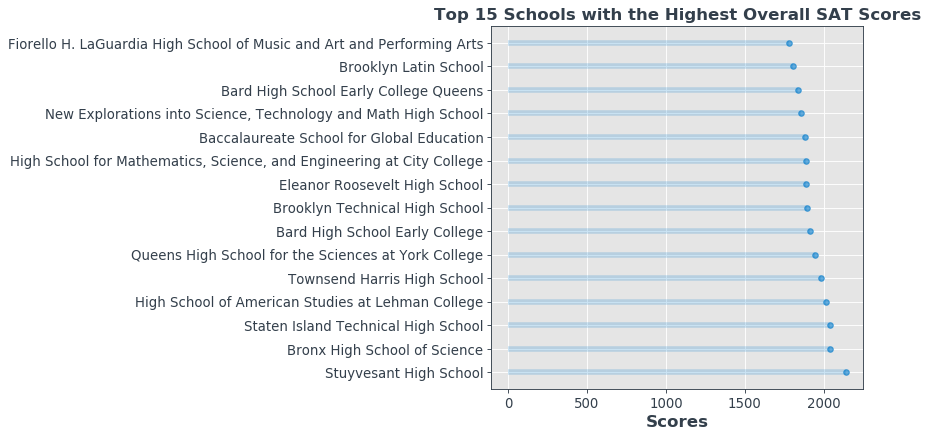

In [10]:
scores2 = scores.copy()
scores2.sort_values(['Ave_SAT_Score_Overall'], ascending = False, axis = 0, inplace = True )
scores_top15 = scores2.head(15) 

plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')

plt.hlines(y=scores_top15.School_Name, xmin=0, xmax=scores_top15.Ave_SAT_Score_Overall, 
           color='#007ACC', alpha=0.2, linewidth=5)
plt.plot(scores_top15.Ave_SAT_Score_Overall, scores_top15.School_Name, "o", markersize=5, color='#007ACC', alpha=0.6)
plt.xlabel('Scores', fontsize=15, fontweight='black', color = '#333F4B')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title("Top 15 Schools with the Highest Overall SAT Scores", fontsize=15, fontweight='black', color = '#333F4B')

###### Overall, the top three performing schools are: Stuyvesant High School,  Bronx High School of Science and Staten Island Technical High School.

#### Visualizing Top 15 Schools with the Highest SAT Scores on each Area
---

Text(0.5,1,'Top 15 Schools with the Highest SAT Scores on Writing')

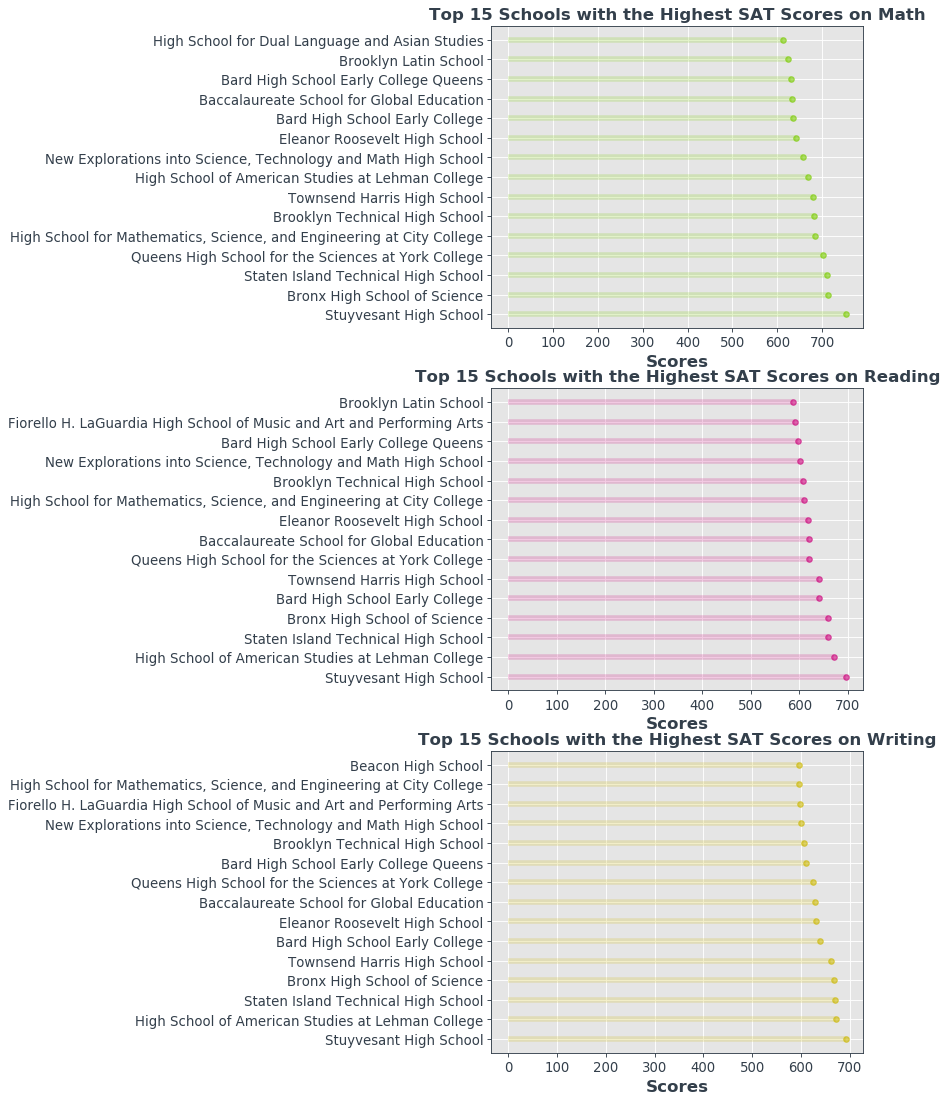

In [11]:
scores2.sort_values(['Ave_SAT_Score_Math'], ascending = False, axis = 0, inplace = True )
scores_top15_math = scores2.head(15) 
scores2.sort_values(['Ave_SAT_Score_Reading'], ascending = False, axis = 0, inplace = True )
scores_top15_read = scores2.head(15) 
scores2.sort_values(['Ave_SAT_Score_Writing'], ascending = False, axis = 0, inplace = True )
scores_top15_write = scores2.head(15) 

figure(num=None, figsize=(6, 17), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(3,1,1)
plt.hlines(y=scores_top15_math.School_Name, xmin=0, xmax=scores_top15_math.Ave_SAT_Score_Math, color='#7acc00', alpha=0.2, linewidth=5)
plt.plot(scores_top15_math.Ave_SAT_Score_Math, scores_top15_math.School_Name, "o", markersize=5, color='#7acc00', alpha=0.6)
plt.xlabel('Scores', fontsize=15, fontweight='black', color = '#333F4B')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title("Top 15 Schools with the Highest SAT Scores on Math", fontsize=15, fontweight='black', color = '#333F4B')
plt.subplot(3,1,2)
plt.hlines(y=scores_top15_read.School_Name, xmin=0, xmax=scores_top15_read.Ave_SAT_Score_Reading, color='#cc007a', alpha=0.2, linewidth=5)
plt.plot(scores_top15_read.Ave_SAT_Score_Reading, scores_top15_read.School_Name, "o", markersize=5, color='#cc007a', alpha=0.6)
plt.xlabel('Scores', fontsize=15, fontweight='black', color = '#333F4B')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title("Top 15 Schools with the Highest SAT Scores on Reading", fontsize=15, fontweight='black', color = '#333F4B')
plt.subplot(3,1,3)
plt.hlines(y=scores_top15_write.School_Name, xmin=0, xmax=scores_top15_write.Ave_SAT_Score_Writing, color='#ccb800', alpha=0.2, linewidth=5)
plt.plot(scores_top15_write.Ave_SAT_Score_Writing, scores_top15_write.School_Name, "o", markersize=5, color='#ccb800', alpha=0.6)
plt.xlabel('Scores', fontsize=15, fontweight='black', color = '#333F4B')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title("Top 15 Schools with the Highest SAT Scores on Writing", fontsize=15, fontweight='black', color = '#333F4B')

##### For the Math Section, the top 3 public high school with the highest scores are still: Stuyvesant High School, Bronx High School of Science and Staten Island Technical High School.   On the other hand, High School of American Studies at Lehman College claimed the top 2 spot for Reading and Writing Section while Stuyvesant High School remain at the top spot. Bronx High School of Science and Staten Island Technical High School claimed the top 3 and 4 spot for the said section.

#### Location of the the Top 5 Schools for Overall and Each Section
---

In [12]:
print('Overall: ', scores_top15[['School_Name','Borough']].head(5))
print('Math Section: ', scores_top15_math[['School_Name','Borough']].head(5))
print('Reading Section: ', scores_top15_read[['School_Name','Borough']].head(5))
print('Writing Section: ', scores_top15_write[['School_Name','Borough']].head(5))

Overall:                                             School_Name        Borough
105                             Stuyvesant High School      Manhattan
203                       Bronx High School of Science          Bronx
110                Staten Island Technical High School  Staten Island
208  High School of American Studies at Lehman College          Bronx
385                        Townsend Harris High School         Queens
Math Section:                                             School_Name        Borough
105                             Stuyvesant High School      Manhattan
203                       Bronx High School of Science          Bronx
110                Staten Island Technical High School  Staten Island
424  Queens High School for the Sciences at York Co...         Queens
80   High School for Mathematics, Science, and Engi...      Manhattan
Reading Section:                                             School_Name        Borough
105                             Stuyvesant High

##### The top school is located at Manhattan. On the other hand, some of schools that claimed the top spots are located at Bronx, Staten Islands and Queens.

#### Visualizing Average Overall SAT Scores per Borough
---

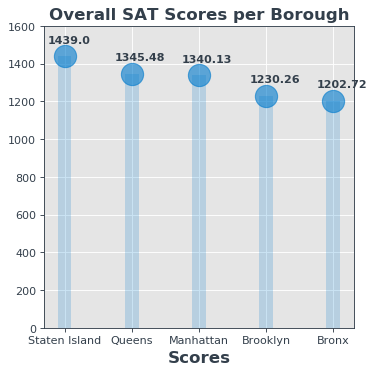

In [13]:
borough_mean = scores2.groupby(['Borough'], as_index=False)['Ave_SAT_Score_Overall'].agg('mean')
borough_mean.sort_values(['Ave_SAT_Score_Overall'], ascending = False, axis = 0, inplace = True )
borough_mean_overall = borough_mean.head(15) 

figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')

plt.bar(borough_mean.Borough, borough_mean.Ave_SAT_Score_Overall, 
           color='#007ACC', alpha=0.2, width = 0.2, )
plt.plot( borough_mean.Borough, borough_mean.Ave_SAT_Score_Overall, "o", markersize=20 , color='#007ACC', alpha=0.6)
plt.xlabel('Scores', fontsize=15, fontweight='black', color = '#333F4B')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.title("Overall SAT Scores per Borough", fontsize=15, fontweight='black', color = '#333F4B')
plt.ylim(0,1600)
for i, v in enumerate(borough_mean.Ave_SAT_Score_Overall):
    plt.text(i - 0.25, v + 70, str(round(v,2)), color='#333F4B', fontweight='bold')

##### Even though the top school is located at Manhattan, in terms of average score per borough, it seems that public schools at Staten Islands have the consistent high performance. It is followed by Queens and Manhattan. On the other hand, Bronx seems to have the lowest scores in SAT.

#### Visualizing Average SAT Scores on each Area per Borough
---

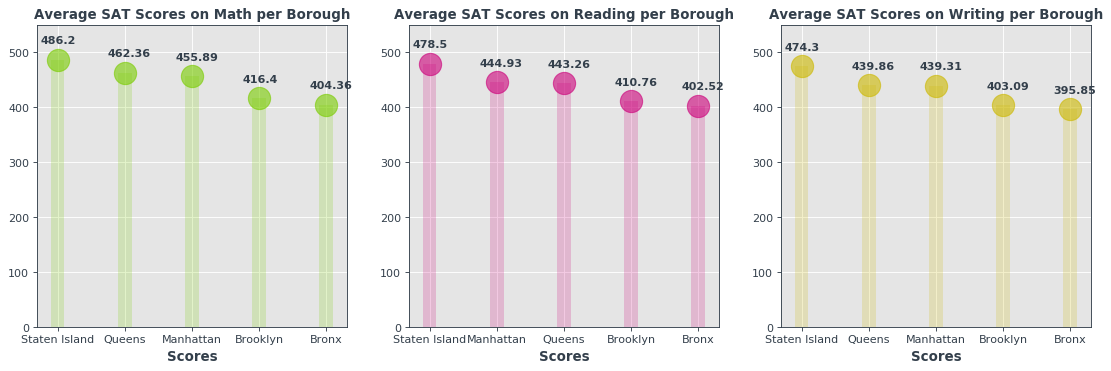

In [14]:
borough_mean = scores2.groupby(['Borough'], as_index=False)['Ave_SAT_Score_Math'].agg('mean')
borough_mean.sort_values(['Ave_SAT_Score_Math'], ascending = False, axis = 0, inplace = True )
borough_mean_math = borough_mean.head(15) 
borough_mean = scores2.groupby(['Borough'], as_index=False)['Ave_SAT_Score_Reading'].agg('mean')
borough_mean.sort_values(['Ave_SAT_Score_Reading'], ascending = False, axis = 0, inplace = True )
borough_mean_read = borough_mean.head(15) 
borough_mean = scores2.groupby(['Borough'], as_index=False)['Ave_SAT_Score_Writing'].agg('mean')
borough_mean.sort_values(['Ave_SAT_Score_Writing'], ascending = False, axis = 0, inplace = True )
borough_mean_write = borough_mean.head(15) 

figure(num=None, figsize=(17, 5), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(1,3,1)
plt.bar(borough_mean_math.Borough, borough_mean_math.Ave_SAT_Score_Math, 
           color='#7acc00', alpha=0.2, width = 0.2, )
plt.plot( borough_mean_math.Borough, borough_mean_math.Ave_SAT_Score_Math, "o", markersize=20 , color='#7acc00', alpha=0.6)
plt.xlabel('Scores', fontsize=12, fontweight='black', color = '#333F4B')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.title("Average SAT Scores on Math per Borough", fontsize=12, fontweight='black', color = '#333F4B')
plt.ylim(0,550)
for i, v in enumerate(borough_mean_math.Ave_SAT_Score_Math):
    plt.text(i - 0.25, v + 30, str(round(v,2)), color='#333F4B', fontweight='bold')

plt.subplot(1,3,2)
plt.bar(borough_mean_read.Borough, borough_mean_read.Ave_SAT_Score_Reading, 
           color='#cc007a', alpha=0.2, width = 0.2, )
plt.plot( borough_mean_read.Borough, borough_mean_read.Ave_SAT_Score_Reading, "o", markersize=20 , color='#cc007a', alpha=0.6)
plt.xlabel('Scores', fontsize=12, fontweight='black', color = '#333F4B')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.title("Average SAT Scores on Reading per Borough", fontsize=12, fontweight='black', color = '#333F4B')
plt.ylim(0,550)
for i, v in enumerate(borough_mean_read.Ave_SAT_Score_Reading):
    plt.text(i - 0.25, v + 30, str(round(v,2)), color='#333F4B', fontweight='bold')
    
plt.subplot(1,3,3)
plt.bar(borough_mean_write.Borough, borough_mean_write.Ave_SAT_Score_Writing, 
           color='#ccb800', alpha=0.2, width = 0.2, )
plt.plot( borough_mean_write.Borough, borough_mean_write.Ave_SAT_Score_Writing, "o", markersize=20 , color='#ccb800', alpha=0.6)
plt.xlabel('Scores', fontsize=12, fontweight='black', color = '#333F4B')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.title("Average SAT Scores on Writing per Borough", fontsize=12, fontweight='black', color = '#333F4B')
plt.ylim(0,550)
for i, v in enumerate(borough_mean_write.Ave_SAT_Score_Writing):
    plt.text(i - 0.25, v + 30, str(round(v,2)), color='#333F4B', fontweight='bold')

##### From the figure above, it is very consistent that public schools at Staten Islands have the highest scores across each section of SAT even though the top school is located at Manhattan. On the other hand, Bronx still has the lowest scores across each section of SAT.

##### Since it is Staten Island that has the highest scores on SAT, we will focus more on the neighborhoods of this borough. The list of Neighborhoods in the Staten Island was found on this wikipedia page: [https://en.wikipedia.org/wiki/List_of_Staten_Island_neighborhoods](https://en.wikipedia.org/wiki/List_of_Staten_Island_neighborhoods)

#### The Staten Island
---

In [15]:
# Subsetting data of schools in Staten Island
staten_island = scores[scores['Borough'] == 'Staten Island']
staten_island.shape

(10, 23)

C:\Users\10012211\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5,1,'Overall SAT Scores of Schools in Staten Island')

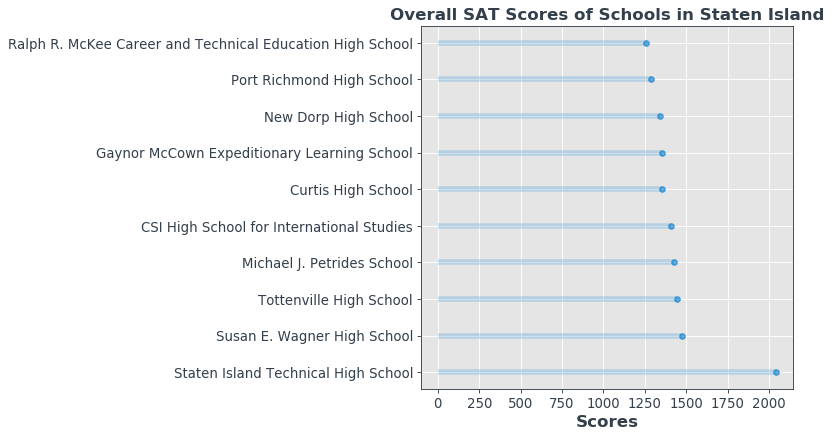

In [16]:
# scores2 = scores.copy()
staten_island.sort_values(['Ave_SAT_Score_Overall'], ascending = False, axis = 0, inplace = True )
scores_top10 = staten_island.head(10)

figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')

plt.hlines(y=scores_top10.School_Name, xmin=0, xmax=scores_top10.Ave_SAT_Score_Overall, 
           color='#007ACC', alpha=0.2, linewidth=5)
plt.plot(scores_top10.Ave_SAT_Score_Overall, scores_top10.School_Name, "o", markersize=5, color='#007ACC', alpha=0.6)
plt.xlabel('Scores', fontsize=15, fontweight='black', color = '#333F4B')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title("Overall SAT Scores of Schools in Staten Island", fontsize=15, fontweight='black', color = '#333F4B')

##### The top performing school at Staten Island is Staten Island Technical School which is also part of the Top 3 Performing School in the whole New York City.

In [17]:
# Creating a new dataset of the Neighborhoods of Staten Island and generating their co-ordinates.
Neighborhood = ['Annadale', 'Arlington', 'Arrochar', 'Bay Terrace', 'Bloomfield', 'Bulls Head', 'Castleton Corners',
                'Charleston', 'Clifton', 'Concord', 'Dongan Hills', 'Egbertville', 'Elm Park', 'Eltingville', 
                'Emerson Hill', 'Fort Wadsworth', 'Graniteville', 'Grant City', 'Grasmere', 'Great Kills', 
                'Greenridge', 'Grymes Hill', 'Hamilton Park', 'Heartland Village', 'Huguenot', 'Mariners Harbor',
                'Midland Beach', 'New Brighton', 'New Dorp', 'New Springville', 'Oakwood', 'Old Place', 'Old Town',
                'Pleasant Plains', 'Port Ivory', 'Port Richmond', 'Randall Manor', 'Richmond Valley', 'Richmondtown',
                'Rosebank', 'Rossville', 'Saint George', 'South Beach', 'Stapleton', 'Todt Hill', 'Tompkinsville', 
                'Tottenville', 'Tottenville Beach', 'Travis', 'Westerleigh', 'West New Brighton', 'Willowbrook', 'Woodrow']
Borough = 'Staten Island'
Latitude = ''
Longitude = ''
df_neigh = {'Neighborhood': Neighborhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
neig = pd.DataFrame(data=df_neigh, columns=['Neighborhood', 'Borough', 'Latitude', 'Longitude'], index=None)

In [46]:
# Finding the coordiantes of each Neighborhood in the Stated Island
Latitude = []
Longitude = []
for i in range(len(Neighborhood)):
    address = '{},New York City'.format(Neighborhood[i])
    geolocator = Nominatim(user_agent="US_agent")
    try:
        location = geolocator.geocode(address, timeout=None)
        print(location.latitude, location.longitude)
        Latitude.append(location.latitude)
        Longitude.append(location.longitude)
    except GeocoderTimedOut as e:
        print("Error: geocode failed on input %s with message %s"%(address, e))
        Latitude.append('')
        Longitude.append('')
print(Latitude, Longitude)

C:\Users\10012211\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `timeout=None` has been passed to a geocoder call. Using default geocoder timeout. In geopy 2.0 the behavior will be different: None will mean "no timeout" instead of "default geocoder timeout". Pass geopy.geocoders.base.DEFAULT_SENTINEL instead of None to get rid of this warning.
  


40.5445496 -74.1765324
40.6323257 -74.1651437
40.5984379 -74.0726412
40.5552778 -74.1341667
40.6126039 -74.1781995
40.6070484 -74.1620879
40.6131597 -74.1223647
40.5367719 -74.2373672
40.6201041 -74.0770857
40.6081599 -74.0843081
40.5979271 -74.0980274
40.57862225 -74.131569684557
40.6314925 -74.1487544
40.5453831 -74.1656988
40.6085851 -74.0945642
40.60076325 -74.057639004396
40.6248259 -74.1484765
40.5820492 -74.1048641
40.6042711 -74.087086
40.5542718 -74.1515318
40.5612236 -74.1698852
40.6187152 -74.0934751
40.6417264 -74.0900718
40.5883333 -74.1577778
40.5373275 -74.1945884
40.6367701 -74.1587547
40.5731606 -74.094586
40.6423258 -74.0929195
40.5739938 -74.1159755
40.5934376 -74.163199
40.563994 -74.1159754
40.6303813 -74.1859776
40.5962681 -74.0875916
40.5239944 -74.2156999
40.6409366 -74.1801442
40.6331592 -74.1365318
40.6441993 -74.1045764039448
40.5201055 -74.2293113
40.5728815 -74.1373656
40.6139932 -74.0662521
40.5556238 -74.2128982
40.6439626 -74.0734416
40.5903825 -74.06680

In [111]:
df_neigh = {'Neighborhood': Neighborhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
neig = pd.DataFrame(data=df_neigh, columns=['Neighborhood', 'Borough', 'Latitude', 'Longitude'], index=None)
neig

,Neighborhood,Borough,Latitude,Longitude
0,Annadale,Staten Island,40.544550,-74.176532
1,Arlington,Staten Island,40.632326,-74.165144
2,Arrochar,Staten Island,40.598438,-74.072641
3,Bay Terrace,Staten Island,40.555278,-74.134167
4,Bloomfield,Staten Island,40.612604,-74.178200
5,Bulls Head,Staten Island,40.607048,-74.162088
6,Castleton Corners,Staten Island,40.613160,-74.122365
7,Charleston,Staten Island,40.536772,-74.237367
8,Clifton,Staten Island,40.620104,-74.077086
9,Concord,Staten Island,40.608160,-74.084308


In [48]:
#Get the coordinates of Lighthouse Hill(center for graphing), NYC, United Kingdom
address = 'Greenridge, New York City'
geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Lighthouse Hill, New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Lighthouse Hill, New York City are 40.5612236, -74.1698852.


In [79]:
# create map of New York using latitude and longitude values
mapa = folium.Map(location=[latitude, longitude], zoom_start=11.45)    
for lat, lng, borough, neighborhood in zip(neig['Latitude'], neig['Longitude'], 
                                           neig['Borough'], neig['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True) 
    folium.CircleMarker([lat, lng],
                        radius=5,
                        popup=label,
                        color='blue',
                        fill=True,
                        fill_color='#3186cc',
                        fill_opacity=0.7,
                        parse_html=False).add_to(mapa)  
folium.LayerControl().add_to(mapa)
mapa.save('map_location.html')

In [112]:
IFrame(src='./map_location.html', width=950, height=600) 

### B. Modelling <a class="anchor" id="model"></a>
---
In order to find out the most common venues around the neighborhood that may affect the school life of students, here are the steps to be taken. 
  
 * Find all the venues within the 500 meter radius of each neighborhood.
 * Perform one hot encoding on the venues data for modelling.
 * Group the venues by the neighborhood and compute their mean.
 * Perform K-means clustering to attained clusters.

#### Data Wrangling to find all the venues on each Neighborhood, finding the mean of occurences and top venues on each Neighborhood
---

In [81]:
def getvenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            client_id, client_secret, version, lat, lng, radius, limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

venues = getvenues(names=neig['Neighborhood'],
                   latitudes=neig['Latitude'],
                   longitudes=neig['Longitude'])

Annadale
Arlington
Arrochar
Bay Terrace
Bloomfield
Bulls Head
Castleton Corners
Charleston
Clifton
Concord
Dongan Hills
Egbertville
Elm Park
Eltingville
Emerson Hill
Fort Wadsworth
Graniteville
Grant City
Grasmere
Great Kills
Greenridge
Grymes Hill
Hamilton Park
Heartland Village
Huguenot
Mariners Harbor
Midland Beach
New Brighton
New Dorp
New Springville
Oakwood
Old Place
Old Town
Pleasant Plains
Port Ivory
Port Richmond
Randall Manor
Richmond Valley
Richmondtown
Rosebank
Rossville
Saint George
South Beach
Stapleton
Todt Hill
Tompkinsville
Tottenville
Tottenville Beach
Travis
Westerleigh
West New Brighton
Willowbrook
Woodrow


In [82]:
print(venues.shape)
venues

(670, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Annadale,40.544550,-74.176532,Annadale Terrace,40.542555,-74.177187,Restaurant
1,Annadale,40.544550,-74.176532,Annadale Diner,40.542079,-74.177325,Diner
2,Annadale,40.544550,-74.176532,Play Sports Bar,40.540418,-74.177196,Sports Bar
3,Annadale,40.544550,-74.176532,Il Sogno,40.541286,-74.178489,Restaurant
4,Annadale,40.544550,-74.176532,MTA SIR - Annadale,40.540482,-74.178185,Train Station
5,Annadale,40.544550,-74.176532,MTA Bus - Annadale Rd & Arden Av (S55),40.544326,-74.176667,Bus Stop
6,Annadale,40.544550,-74.176532,The Curly Wolf Saloon,40.541741,-74.177299,Pub
7,Annadale,40.544550,-74.176532,Annadale Bakery,40.541654,-74.177226,Bakery
8,Annadale,40.544550,-74.176532,Annadale Green,40.541740,-74.177859,Park
9,Annadale,40.544550,-74.176532,Square Pizza,40.541462,-74.177444,Pizza Place


In [83]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))
venues.groupby('Neighborhood').count()

There are 167 uniques categories.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Annadale,20,20,20,20,20,20
Arlington,7,7,7,7,7,7
Arrochar,6,6,6,6,6,6
Bay Terrace,7,7,7,7,7,7
Bloomfield,10,10,10,10,10,10
Bulls Head,19,19,19,19,19,19
Castleton Corners,30,30,30,30,30,30
Charleston,10,10,10,10,10,10
Clifton,9,9,9,9,9,9


In [84]:
# Onehot Encoding
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")
onehot['Neighborhood'] = venues['Neighborhood'] 
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]
onehot

,Neighborhood,Accessories Store,American Restaurant,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Garden,Board Shop,Bookstore,Botanical Garden,Bowling Alley,Breakfast Spot,Brewery,Buffet,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Cajun / Creole Restaurant,Candy Store,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cultural Center,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Dry Cleaner,Electronics Store,Elementary School,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Flower Shop,Food,Food Truck,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Laundry Service,Lawyer,Library,Lighthouse,Liquor Store,Locksmith,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Monument / Landmark,Mountain,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightlife Spot,Optical Shop,Other Repair Shop,Outdoors & Recreation,Outlet Mall,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Polish Restaurant,Print Shop,Professional & Other Places,Pub,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shopping Mall,Skate Park,Smoke Shop,Smoothie Shop,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tapas Restaurant,Tattoo Parlor,Tea Room,Theater,Thrift / Vintage Store,Toll Plaza,Toy / Game Store,Trail,Train Station,Video Game Store,Video Store,Vietnamese Restaurant,Weight Loss Center,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Annadale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Annadale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Annadale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Annadale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Annadale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [85]:
# Group by neighborhood and take mean of the frequency of  occurences of each venue
grouped = onehot.groupby('Neighborhood').mean().reset_index()
print(grouped.shape)
grouped

(52, 168)


,Neighborhood,Accessories Store,American Restaurant,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Garden,Board Shop,Bookstore,Botanical Garden,Bowling Alley,Breakfast Spot,Brewery,Buffet,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Cajun / Creole Restaurant,Candy Store,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cultural Center,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Dry Cleaner,Electronics Store,Elementary School,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Flower Shop,Food,Food Truck,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Laundry Service,Lawyer,Library,Lighthouse,Liquor Store,Locksmith,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Monument / Landmark,Mountain,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightlife Spot,Optical Shop,Other Repair Shop,Outdoors & Recreation,Outlet Mall,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Polish Restaurant,Print Shop,Professional & Other Places,Pub,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shopping Mall,Skate Park,Smoke Shop,Smoothie Shop,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tapas Restaurant,Tattoo Parlor,Tea Room,Theater,Thrift / Vintage Store,Toll Plaza,Toy / Game Store,Trail,Train Station,Video Game Store,Video Store,Vietnamese Restaurant,Weight Loss Center,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Annadale,0.000000,0.100000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.050000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.05,0.0,0.000000,0.000000,0.100000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.05,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Arlington,0.000000,0.142857,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [86]:
# Getting top venues for each Neighborhood
num_top_venues = 5

for hood in grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = grouped[grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Annadale----
                 venue  freq
0          Pizza Place  0.20
1           Restaurant  0.10
2  American Restaurant  0.10
3               Bakery  0.05
4           Sports Bar  0.05


----Arlington----
                 venue  freq
0             Bus Stop  0.43
1        Deli / Bodega  0.14
2  American Restaurant  0.14
3          Supermarket  0.14
4         Home Service  0.14


----Arrochar----
                   venue  freq
0               Bus Stop  0.33
1            Pizza Place  0.33
2          Deli / Bodega  0.17
3             Bagel Shop  0.17
4  Performing Arts Venue  0.00


----Bay Terrace----
                   venue  freq
0    American Restaurant  0.14
1          Train Station  0.14
2             Playground  0.14
3  Performing Arts Venue  0.14
4          Shopping Mall  0.14


----Bloomfield----
                venue  freq
0               Hotel   0.3
1  Italian Restaurant   0.1
2         Video Store   0.1
3                 Spa   0.1
4         Candy Store   0.1


----Bulls H

                 venue  freq
0        Deli / Bodega  0.12
1           Bagel Shop  0.12
2  American Restaurant  0.12
3       Ice Cream Shop  0.12
4                 Park  0.12


----Travis----
                venue  freq
0  Spanish Restaurant  0.22
1            Bus Stop  0.22
2                Park  0.22
3      Baseball Field  0.11
4      Sandwich Place  0.11


----West New Brighton----
              venue  freq
0          Bus Stop  0.24
1       Pizza Place  0.12
2    Cosmetics Shop  0.06
3    Breakfast Spot  0.06
4  Sushi Restaurant  0.06


----Westerleigh----
               venue  freq
0             Arcade   1.0
1  Accessories Store   0.0
2               Park   0.0
3        Music Store   0.0
4        Music Venue   0.0


----Willowbrook----
                     venue  freq
0                 Bus Stop   0.8
1                     Café   0.2
2        Accessories Store   0.0
3                     Park   0.0
4  New American Restaurant   0.0




#### Creating Dataframe for the Modelling
---

In [87]:
# Displaying the top 10 most common venues on each Neighborhood
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Neighborhood'] = grouped['Neighborhood']

for ind in np.arange(grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Annadale,Pizza Place,Restaurant,American Restaurant,Cosmetics Shop,Food,Park,Liquor Store,Sports Bar,Train Station,Sushi Restaurant
1,Arlington,Bus Stop,Deli / Bodega,American Restaurant,Home Service,Supermarket,Event Space,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant
2,Arrochar,Pizza Place,Bus Stop,Deli / Bodega,Bagel Shop,Elementary School,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market
3,Bay Terrace,Food Truck,American Restaurant,Playground,Italian Restaurant,Performing Arts Venue,Train Station,Shopping Mall,Electronics Store,Filipino Restaurant,Fast Food Restaurant
4,Bloomfield,Hotel,Department Store,Spa,Italian Restaurant,Video Store,Cocktail Bar,Candy Store,Tea Room,Elementary School,Flower Shop
5,Bulls Head,Baseball Field,Pharmacy,Diner,Bus Stop,Food Truck,Playground,Convenience Store,Coffee Shop,Chinese Restaurant,Sandwich Place
6,Castleton Corners,Ice Cream Shop,Pizza Place,Bank,Deli / Bodega,Cosmetics Shop,Beer Garden,Diner,Convenience Store,Clothing Store,Chocolate Shop
7,Charleston,German Restaurant,Deli / Bodega,Music Venue,Recreation Center,Rental Car Location,Restaurant,Bakery,Liquor Store,General Entertainment,Scenic Lookout
8,Clifton,Bus Stop,Deli / Bodega,Discount Store,Baseball Field,Chinese Restaurant,Train Station,Grocery Store,Intersection,Diner,Event Space
9,Concord,Deli / Bodega,Automotive Shop,Park,Bus Stop,Food Truck,Pizza Place,Supermarket,Gym / Fitness Center,Cosmetics Shop,Train Station


#### Implementing the Clustering Algorithm (K-Means Clustering)
---

In [88]:
# Finding the Optimal Number of Clusters

# Applying minmax scale to avoid bias
mms = MinMaxScaler()
grouped_clustering = grouped.drop('Neighborhood', 1)
mms.fit(grouped_clustering)
data_transformed = mms.transform(grouped_clustering)

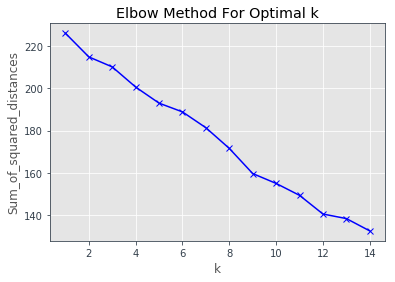

In [89]:
# Plotting the results
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

##### From the graph above, it can be seen that the elbow was found at **k=9**. Therefore we set the number of clusters to 9.

In [90]:
# Implementing the Clustering Algorithm

kclusters = 9
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)
kmeans.labels_[1:10]

array([3, 3, 0, 0, 4, 4, 4, 3, 8])

In [91]:
# Adding clustering labels
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
merged = neig
merged = merged.join(venues_sorted.set_index('Neighborhood'), on='Neighborhood')
# Dropping NA
merged.dropna(inplace = True)
merged

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Annadale,Staten Island,40.544550,-74.176532,4.0,Pizza Place,Restaurant,American Restaurant,Cosmetics Shop,Food,Park,Liquor Store,Sports Bar,Train Station,Sushi Restaurant
1,Arlington,Staten Island,40.632326,-74.165144,3.0,Bus Stop,Deli / Bodega,American Restaurant,Home Service,Supermarket,Event Space,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant
2,Arrochar,Staten Island,40.598438,-74.072641,3.0,Pizza Place,Bus Stop,Deli / Bodega,Bagel Shop,Elementary School,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market
3,Bay Terrace,Staten Island,40.555278,-74.134167,0.0,Food Truck,American Restaurant,Playground,Italian Restaurant,Performing Arts Venue,Train Station,Shopping Mall,Electronics Store,Filipino Restaurant,Fast Food Restaurant
4,Bloomfield,Staten Island,40.612604,-74.178200,0.0,Hotel,Department Store,Spa,Italian Restaurant,Video Store,Cocktail Bar,Candy Store,Tea Room,Elementary School,Flower Shop
5,Bulls Head,Staten Island,40.607048,-74.162088,4.0,Baseball Field,Pharmacy,Diner,Bus Stop,Food Truck,Playground,Convenience Store,Coffee Shop,Chinese Restaurant,Sandwich Place
6,Castleton Corners,Staten Island,40.613160,-74.122365,4.0,Ice Cream Shop,Pizza Place,Bank,Deli / Bodega,Cosmetics Shop,Beer Garden,Diner,Convenience Store,Clothing Store,Chocolate Shop
7,Charleston,Staten Island,40.536772,-74.237367,4.0,German Restaurant,Deli / Bodega,Music Venue,Recreation Center,Rental Car Location,Restaurant,Bakery,Liquor Store,General Entertainment,Scenic Lookout
8,Clifton,Staten Island,40.620104,-74.077086,3.0,Bus Stop,Deli / Bodega,Discount Store,Baseball Field,Chinese Restaurant,Train Station,Grocery Store,Intersection,Diner,Event Space
9,Concord,Staten Island,40.608160,-74.084308,8.0,Deli / Bodega,Automotive Shop,Park,Bus Stop,Food Truck,Pizza Place,Supermarket,Gym / Fitness Center,Cosmetics Shop,Train Station


#### Visulaizing the Map
---

In [94]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11.45)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors = []
for lat, lon, poi, cluster in zip(merged['Latitude'], merged['Longitude'], merged['Neighborhood'], merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.5).add_to(map_clusters)
folium.LayerControl().add_to(map_clusters)
map_clusters.save('map_clusters.html')

In [110]:
IFrame(src='./map_clusters.html', width=950, height=600) 

## Cluster Analysis<a class="anchor" id="analysis"></a>
___


#### Cluster 0 (Dining and Leisure Place)
---

In [96]:
merged[merged['Cluster Labels'] == 0]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Bay Terrace,Staten Island,40.555278,-74.134167,0.0,Food Truck,American Restaurant,Playground,Italian Restaurant,Performing Arts Venue,Train Station,Shopping Mall,Electronics Store,Filipino Restaurant,Fast Food Restaurant
4,Bloomfield,Staten Island,40.612604,-74.178200,0.0,Hotel,Department Store,Spa,Italian Restaurant,Video Store,Cocktail Bar,Candy Store,Tea Room,Elementary School,Flower Shop
11,Egbertville,Staten Island,40.578622,-74.131570,0.0,Cosmetics Shop,Italian Restaurant,Massage Studio,Trail,Bagel Shop,Dim Sum Restaurant,Diner,Food,Flower Shop,Filipino Restaurant
19,Great Kills,Staten Island,40.554272,-74.151532,0.0,Pizza Place,Italian Restaurant,Bar,Bagel Shop,Spanish Restaurant,Bus Stop,Falafel Restaurant,Chinese Restaurant,Bakery,Bank
24,Huguenot,Staten Island,40.537328,-74.194588,0.0,Movie Theater,Italian Restaurant,Nightlife Spot,Yoga Studio,Elementary School,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant
28,New Dorp,Staten Island,40.573994,-74.115976,0.0,Italian Restaurant,Deli / Bodega,Indian Restaurant,Taco Place,Gas Station,Mexican Restaurant,Flower Shop,Dim Sum Restaurant,Dessert Shop,Pizza Place
32,Old Town,Staten Island,40.596268,-74.087592,0.0,Italian Restaurant,Pizza Place,Jewelry Store,Pharmacy,Mattress Store,Gas Station,Liquor Store,Restaurant,Optical Shop,Bank
38,Richmondtown,Staten Island,40.572882,-74.137366,0.0,Spa,History Museum,Italian Restaurant,Art Museum,Bagel Shop,Café,Massage Studio,Event Space,Food,Flower Shop
41,Saint George,Staten Island,40.643963,-74.073442,0.0,Clothing Store,Italian Restaurant,Sporting Goods Shop,Bar,Coffee Shop,Tapas Restaurant,Deli / Bodega,Pharmacy,Pizza Place,Museum
46,Tottenville,Staten Island,40.511217,-74.249312,0.0,Pizza Place,American Restaurant,Ice Cream Shop,Deli / Bodega,Italian Restaurant,Train Station,Park,Bagel Shop,Elementary School,Flower Shop


##### The first cluster has the second to the highest number of Neighborhood. Most of the common venues are food related places such as food trucks, restaurants and pizza place. In addition, other common venues includes, playgrounds, bar and department store. Therefore, this cluster can be known as "Dining and Leisure Place".
  
  
#### Cluster 1 (Pragmatic District)
---

In [97]:
merged[merged['Cluster Labels'] == 1]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
34,Port Ivory,Staten Island,40.640937,-74.180144,1.0,Locksmith,Yoga Studio,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Elementary School


##### Most common venue for the second cluster is a locksmith place. Thus, it can be named as the "Pragmatic District".
  

#### Cluster 2 (Food District)
---

In [98]:
merged[merged['Cluster Labels'] == 2]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
51,Willowbrook,Staten Island,40.60316,-74.138476,2.0,Bus Stop,Café,Yoga Studio,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space


##### Different restaurants, cafe and markets are the most common venues in the third cluster. Therefore, it can be known as the "Food District".
  

#### Cluster 3 (Travel Friendly Place)
---

In [99]:
merged[merged['Cluster Labels'] == 3]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Arlington,Staten Island,40.632326,-74.165144,3.0,Bus Stop,Deli / Bodega,American Restaurant,Home Service,Supermarket,Event Space,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant
2,Arrochar,Staten Island,40.598438,-74.072641,3.0,Pizza Place,Bus Stop,Deli / Bodega,Bagel Shop,Elementary School,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market
8,Clifton,Staten Island,40.620104,-74.077086,3.0,Bus Stop,Deli / Bodega,Discount Store,Baseball Field,Chinese Restaurant,Train Station,Grocery Store,Intersection,Diner,Event Space
15,Fort Wadsworth,Staten Island,40.600763,-74.057639,3.0,Hotel,Historic Site,Bus Stop,Lighthouse,Elementary School,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market
22,Hamilton Park,Staten Island,40.641726,-74.090072,3.0,Bus Stop,Deli / Bodega,Park,Restaurant,Playground,Mexican Restaurant,Garden Center,Chinese Restaurant,Bowling Alley,Discount Store
23,Heartland Village,Staten Island,40.588333,-74.157778,3.0,Bus Station,Bus Stop,Sandwich Place,Gym / Fitness Center,Yoga Studio,Elementary School,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market
25,Mariners Harbor,Staten Island,40.636770,-74.158755,3.0,Grocery Store,American Restaurant,Coffee Shop,Bus Stop,Nightlife Spot,Yoga Studio,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market
27,New Brighton,Staten Island,40.642326,-74.092919,3.0,Bus Stop,Bar,Deli / Bodega,Playground,Mexican Restaurant,Park,Restaurant,Donut Shop,Chinese Restaurant,Garden Center
35,Port Richmond,Staten Island,40.633159,-74.136532,3.0,Bus Stop,Pizza Place,Martial Arts Dojo,Ice Cream Shop,Deli / Bodega,Supermarket,Laundry Service,Basketball Court,Food Truck,Flower Shop
48,Travis,Staten Island,40.593160,-74.187922,3.0,Spanish Restaurant,Park,Bus Stop,Steakhouse,Sandwich Place,Baseball Field,Elementary School,Filipino Restaurant,Fast Food Restaurant,Farmers Market


##### It is very apparent that the most common venue in the fourth cluster are bus stops and convenience stores. Thus, this cluster can be called the "Travel Friendly Place"
  

#### Cluster 4 (All Around District)
---

In [100]:
merged[merged['Cluster Labels'] == 4]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Annadale,Staten Island,40.544550,-74.176532,4.0,Pizza Place,Restaurant,American Restaurant,Cosmetics Shop,Food,Park,Liquor Store,Sports Bar,Train Station,Sushi Restaurant
5,Bulls Head,Staten Island,40.607048,-74.162088,4.0,Baseball Field,Pharmacy,Diner,Bus Stop,Food Truck,Playground,Convenience Store,Coffee Shop,Chinese Restaurant,Sandwich Place
6,Castleton Corners,Staten Island,40.613160,-74.122365,4.0,Ice Cream Shop,Pizza Place,Bank,Deli / Bodega,Cosmetics Shop,Beer Garden,Diner,Convenience Store,Clothing Store,Chocolate Shop
7,Charleston,Staten Island,40.536772,-74.237367,4.0,German Restaurant,Deli / Bodega,Music Venue,Recreation Center,Rental Car Location,Restaurant,Bakery,Liquor Store,General Entertainment,Scenic Lookout
10,Dongan Hills,Staten Island,40.597927,-74.098027,4.0,Pizza Place,Asian Restaurant,Diner,Bagel Shop,Yoga Studio,Elementary School,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant
13,Eltingville,Staten Island,40.545383,-74.165699,4.0,Sushi Restaurant,Pizza Place,Fast Food Restaurant,Bank,Pharmacy,Diner,Sandwich Place,Restaurant,Donut Shop,Supermarket
16,Graniteville,Staten Island,40.624826,-74.148477,4.0,Diner,Pizza Place,Fast Food Restaurant,Playground,Sushi Restaurant,Convenience Store,Pet Store,Donut Shop,Chinese Restaurant,Mobile Phone Shop
17,Grant City,Staten Island,40.582049,-74.104864,4.0,Convenience Store,Pharmacy,Rental Car Location,BBQ Joint,Bank,Yoga Studio,Electronics Store,Flower Shop,Filipino Restaurant,Fast Food Restaurant
20,Greenridge,Staten Island,40.561224,-74.169885,4.0,Bagel Shop,Pizza Place,Sandwich Place,Asian Restaurant,Coffee Shop,Pet Store,Pharmacy,Diner,Professional & Other Places,Discount Store
26,Midland Beach,Staten Island,40.573161,-74.094586,4.0,Deli / Bodega,Restaurant,Bus Stop,Baseball Field,Pet Store,Dessert Shop,Home Service,Electronics Store,Chinese Restaurant,Café


##### The fifth cluster has a good mixed of different venues such as food place, stores, fields for recreational activities, banks, parks and more. In addition it is the largest cluster of 19 neighborhoods. Therefore, it can be known as the "All Around District".
  

#### Cluster 5 (Technohub)
---

In [101]:
merged[merged['Cluster Labels'] == 5] 

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
49,Westerleigh,Staten Island,40.621215,-74.131809,5.0,Arcade,Yoga Studio,Electronics Store,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space


##### The sixth cluster is mainly electronic stores and arcades. This cluster seems more advanced than the other cluster, making it a "Technohub".
  

#### Cluster 6 (Recreational Place)
---

In [102]:
merged[merged['Cluster Labels'] == 6] 

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,Old Place,Staten Island,40.630381,-74.185978,6.0,Toll Plaza,Harbor / Marina,Park,Dry Cleaner,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space


##### The seventh cluster is mainly for those who are seeking peace to reflect on place such as harbor and park. Thus, it can be called the "Recreational Place".
  

#### Cluster 7 (Physical Activity District)
---

In [103]:
merged[merged['Cluster Labels'] == 7] 

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Grymes Hill,Staten Island,40.618715,-74.093475,7.0,Dance Studio,Trail,Golf Course,Gym,Dessert Shop,Dim Sum Restaurant,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market


##### The second to the last cluster is mainly for those who are looking for physical activities for it is comprised of dance studios, trails, golf courses and gyms. We call it the "Physical Activity District".
  

#### Cluster 8 (Deli Place)
---

In [104]:
merged[merged['Cluster Labels'] == 8] 

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Concord,Staten Island,40.608160,-74.084308,8.0,Deli / Bodega,Automotive Shop,Park,Bus Stop,Food Truck,Pizza Place,Supermarket,Gym / Fitness Center,Cosmetics Shop,Train Station
12,Elm Park,Staten Island,40.631493,-74.148754,8.0,Deli / Bodega,Italian Restaurant,Athletics & Sports,Bus Stop,Elementary School,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market
14,Emerson Hill,Staten Island,40.608585,-74.094564,8.0,Deli / Bodega,Pharmacy,Automotive Shop,Elementary School,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant
18,Grasmere,Staten Island,40.604271,-74.087086,8.0,Deli / Bodega,Cosmetics Shop,Gym / Fitness Center,Peruvian Restaurant,Park,Bus Stop,Pizza Place,Supermarket,Playground,Train Station
37,Richmond Valley,Staten Island,40.520105,-74.229311,8.0,Food,Bank,Deli / Bodega,Smoothie Shop,Train Station,Bus Stop,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market


##### The last cluster is mainly composed of deli/bodega venues. Therefore, it is the "Deli Place".

## Results and Discussion<a class="anchor" id="res"></a>
___
  
The aim of this project is to help parents identify which borough in NYC is ideal for their children to be their next home for a satisfactory performance in SAT. From the data that was studied, although the top performing school for overall and across NYC was **Stuyvesant High School** located at **Manhattan**, when it comes to the performance per borough, it seems that schools at **Staten Island** are more consistent in achieving satisfactorily performance on SAT both overall and across sections (Math, Reading and Writing). In addition **Staten Island Technical High School**, which also is included in the Top 3 Schools with high performance in SAT is located in this area. Thus, we focused more on studying the neighborhood of this borough.
  
Another goal of this project is to identify which area/neighborhood on the borough is suitable for students based on the most common venues on each clustered neighborhood for it will greatly affect the student life of students. Nine (9) clusters were generated namely:
 * Dining and Leisure Place
 * Pragmatic District
 * Food District
 * Travel Friendly Place
 * All Around District
 * Technohub
 * Recreational Place
 * Physical Activity District
 * Deli Place

The most ideal place for students is the **All Around District** for it is comprised of good mixed of different venues such as food place, stores, fields for recreational activities, banks, parks and more. Other options would be, the **Technohub** for those who are seeking advancement and technology lovers or **Physical Activity District** for parents who want their children to be physically active or learn dancing and sports.  

## Conclusion<a class="anchor" id="conclusion"></a>
___

The project provided a means for parents to select which borough in NYC has more consistent satisfactorily score in SAT and is most suitable to shelter their children for a brighter future ahead of them since SAT is a tool for college applications. It also helps in finding a comfortable neighborhood for a student depending on the most common venues located in the place which will greatly affect the students' life. In the future, this project can consider other factors such as cost of living in the areas, demographics and safety on the location for finding the most suitable area to live for a student.